在cuda:0上训练
Epoch:1, 训练损失:1.864, 训练准确率:0.324, 测试准确率:0.679
Epoch:2, 训练损失:0.852, 训练准确率:0.678, 测试准确率:0.735
Epoch:3, 训练损失:0.675, 训练准确率:0.746, 测试准确率:0.778
Epoch:4, 训练损失:0.594, 训练准确率:0.777, 测试准确率:0.795
Epoch:5, 训练损失:0.539, 训练准确率:0.799, 测试准确率:0.812
Epoch:6, 训练损失:0.496, 训练准确率:0.817, 测试准确率:0.814
Epoch:7, 训练损失:0.468, 训练准确率:0.828, 测试准确率:0.825
Epoch:8, 训练损失:0.441, 训练准确率:0.838, 测试准确率:0.849
Epoch:9, 训练损失:0.420, 训练准确率:0.844, 测试准确率:0.851
Epoch:10, 训练损失:0.403, 训练准确率:0.852, 测试准确率:0.861
训练结束。损失: 0.403, 训练准确率: 0.852, 测试准确率: 0.861
1217.6 样本/秒 在 cuda:0


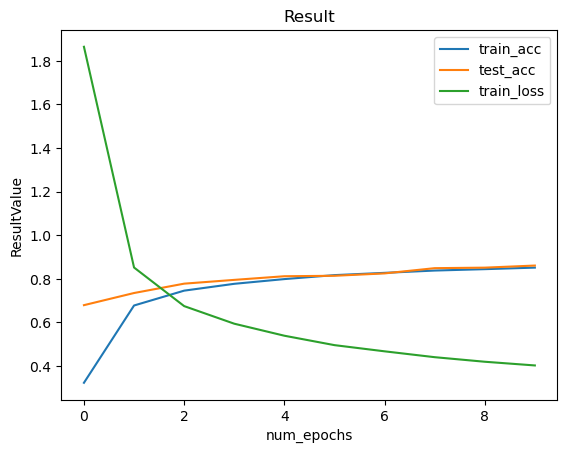

/home/lindenbaum/Documents/Python/DeepLearning/DeepLearning/CNN/st_train.py:230: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(1, n, figsize=(8, 8))


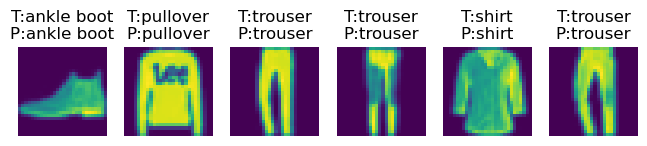

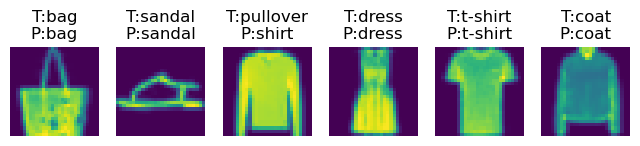

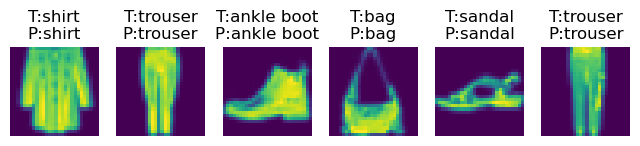

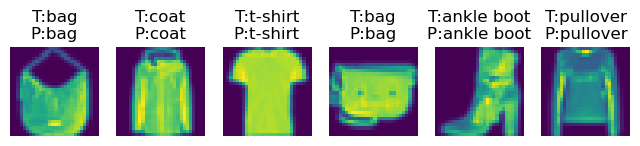

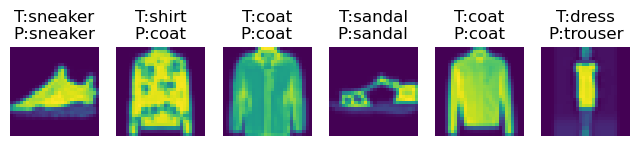

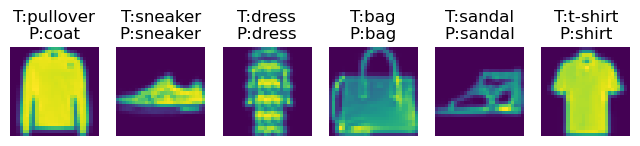

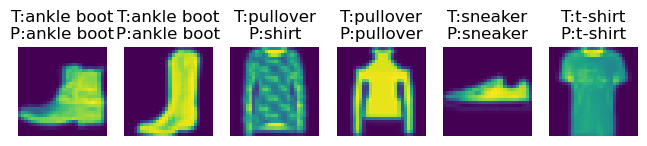

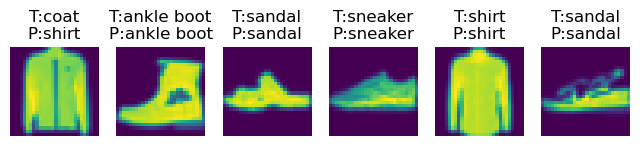

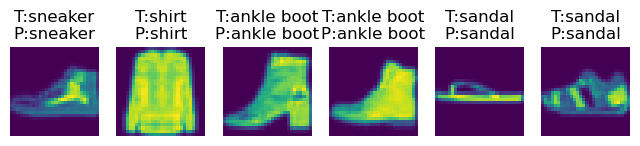

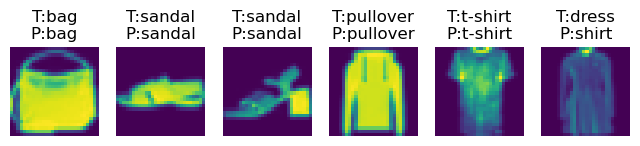

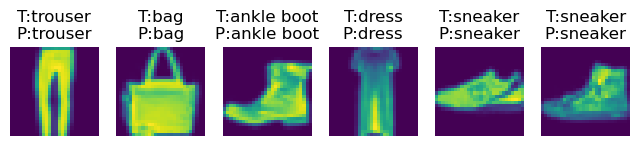

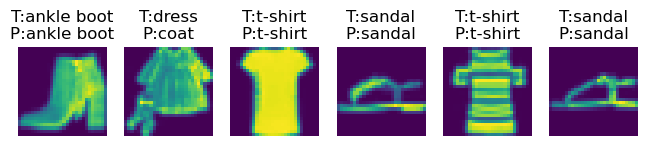

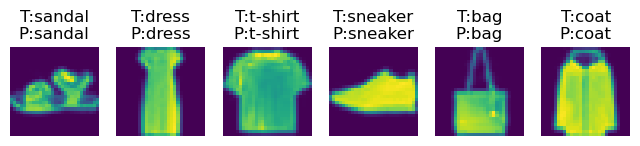

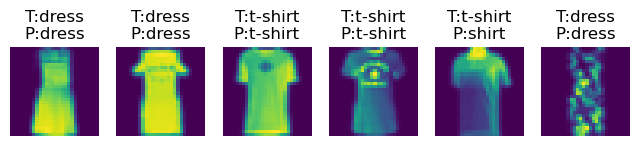

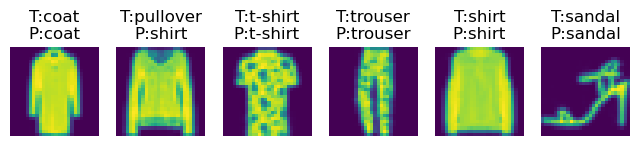

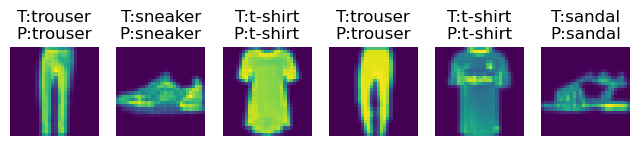

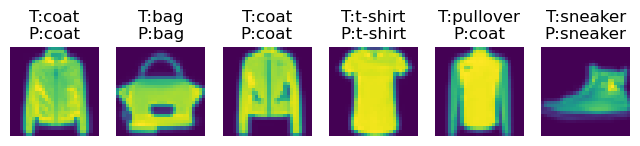

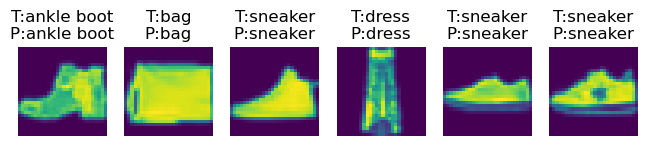

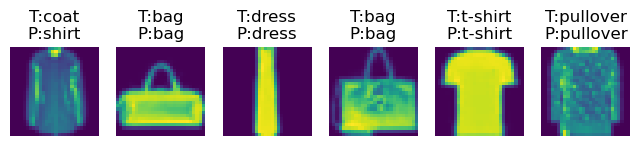

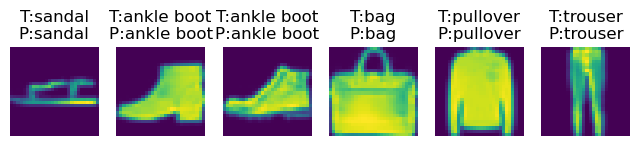

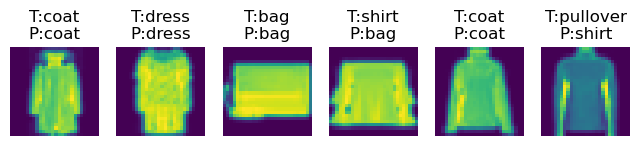

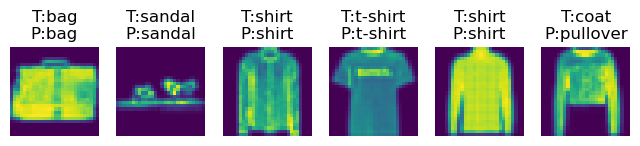

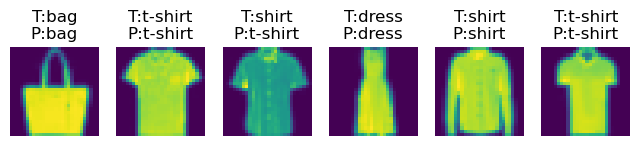

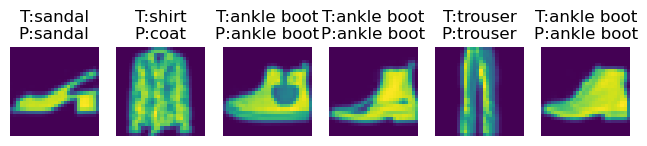

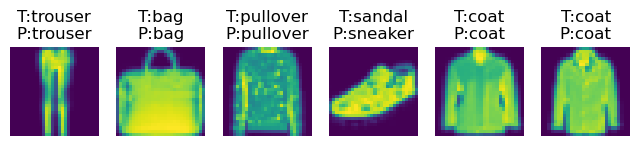

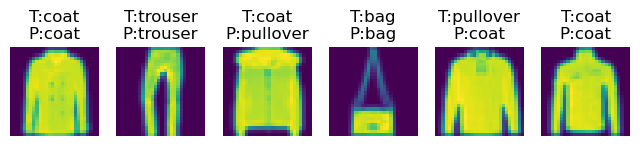

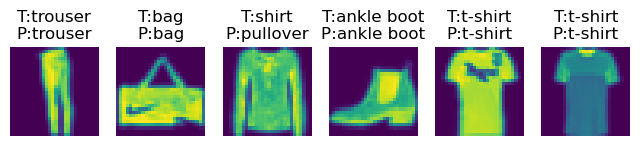

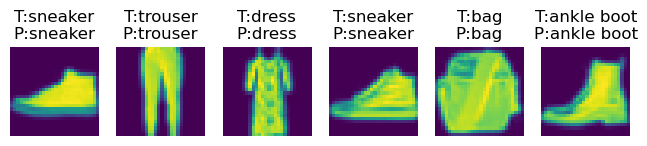

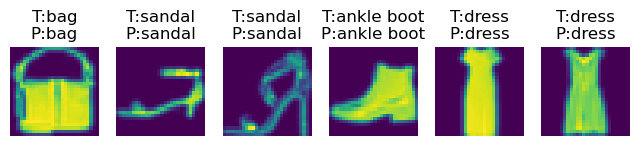

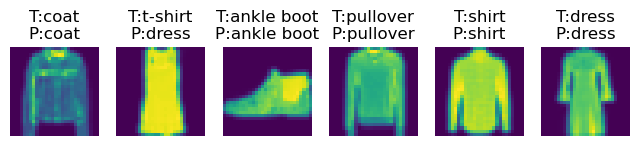

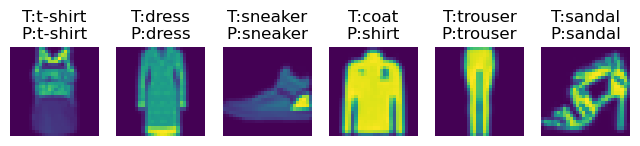

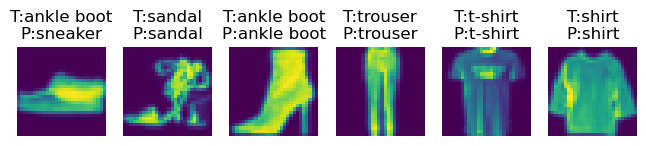

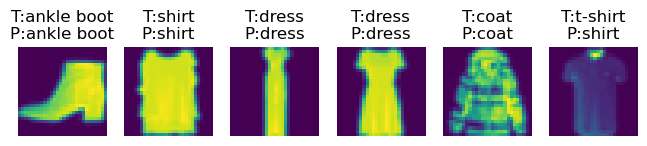

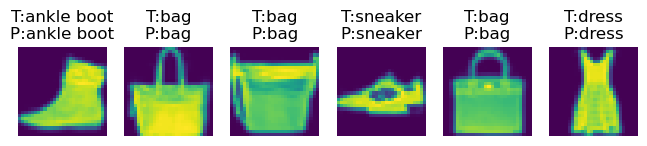

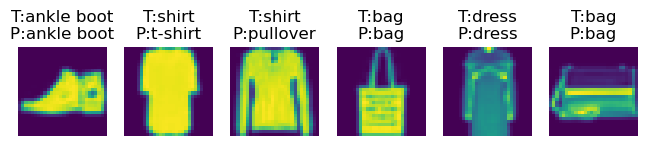

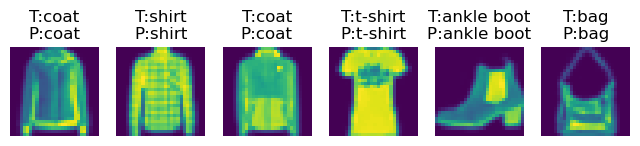

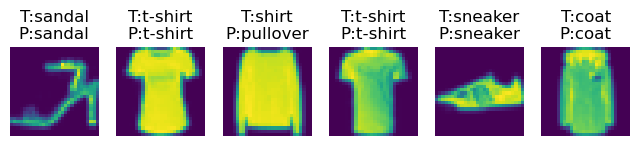

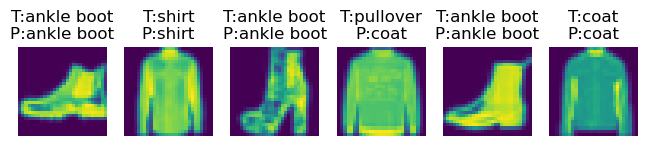

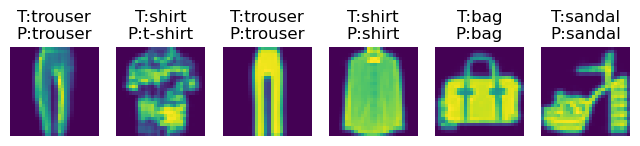

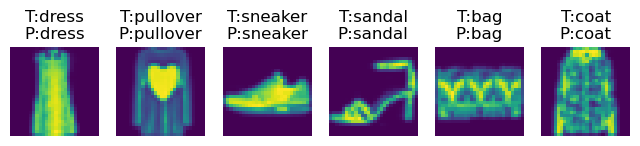

In [4]:
import st_train
from torch import nn
# AlexNet是更为复杂的现代卷积神经网络
AlexNet = nn.Sequential(
# 这里使用一个11*11的更大窗口来捕捉对象。同时，步幅为4，以减少输出的高度和宽度。另外，输出通道的数目远大于LeNet
nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
nn.MaxPool2d(kernel_size=3, stride=2),
# 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
nn.MaxPool2d(kernel_size=3, stride=2),
# 使用三个连续的卷积层和较小的卷积窗口。
# 除了最后的卷积层，输出通道的数量进一步增加。
# 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
nn.MaxPool2d(kernel_size=3, stride=2),
nn.Flatten(),
# 这里全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
nn.Linear(6400, 4096), nn.ReLU(),
nn.Dropout(p=0.5),
nn.Linear(4096, 4096), nn.ReLU(),
nn.Dropout(p=0.5),
# 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
nn.Linear(4096, 10))
# 与LeNet相比，这里的主要变化是使用更小的学习速率训练，这是因为网络更深更广、图像分辨率更高，训练卷积神经网络就更昂贵
batch_size = 256
learning_rate = 0.01
num_epochs = 10
train_iter, test_iter = st_train.load_MINST_data(batch_size, num_workers=16, resize=(224,224)) # 由于使用的是Fashion-MINST数据集, 进行缩放
result = st_train.ResVisualization(('train_acc','test_acc','train_loss'), num_epochs)
st_train.train_gpu(AlexNet, train_iter, test_iter, num_epochs, learning_rate, st_train.try_gpu(), result)
result.plot_res()
st_train.std_prediction_gpu(AlexNet, test_iter, device=st_train.try_gpu() ,resized=True)